In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bankrupt = pd.read_csv("/content/bankruptcy-prevention.csv", sep = ';', header = 0)
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(bankrupt.info())
print(bankrupt.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None
(250, 7)


In [ ]:
bankrupt.isnull().sum() # checking for missing values

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [ ]:
bankrupt_new = bankrupt.iloc[:,:]
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
bankrupt_new["class_yn"] = 1
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [ ]:
bankrupt_new.loc[bankrupt[' class'] == 'bankruptcy', 'class_yn'] = 0 # changing bankruptcy to 0 & non-bankruptcy to 1

In [ ]:
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [ ]:
bankrupt_new.drop(' class', inplace = True, axis =1)
bankrupt_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


EDA

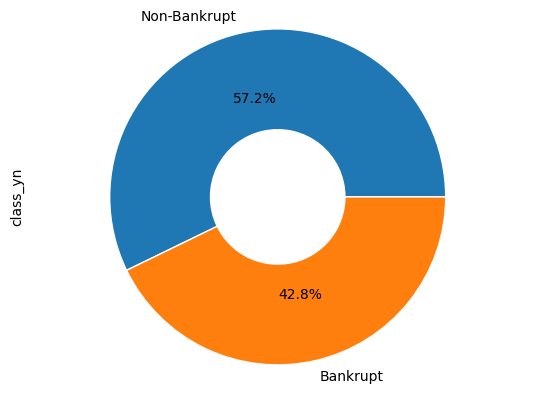

In [ ]:
# Calculate the percentage of bankrupt and non-bankrupt companies
bankrupt_percentage = (bankrupt_new['class_yn'].value_counts() / len(bankrupt_new)) * 100

# Create a pie chart with labels, borders, and percentage labels
bankrupt_percentage.plot(kind='pie', autopct='%1.1f%%', labels=['Non-Bankrupt', 'Bankrupt'], wedgeprops=dict(width=0.6, edgecolor='w'))

# Add labels

plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Show the plot
plt.show()

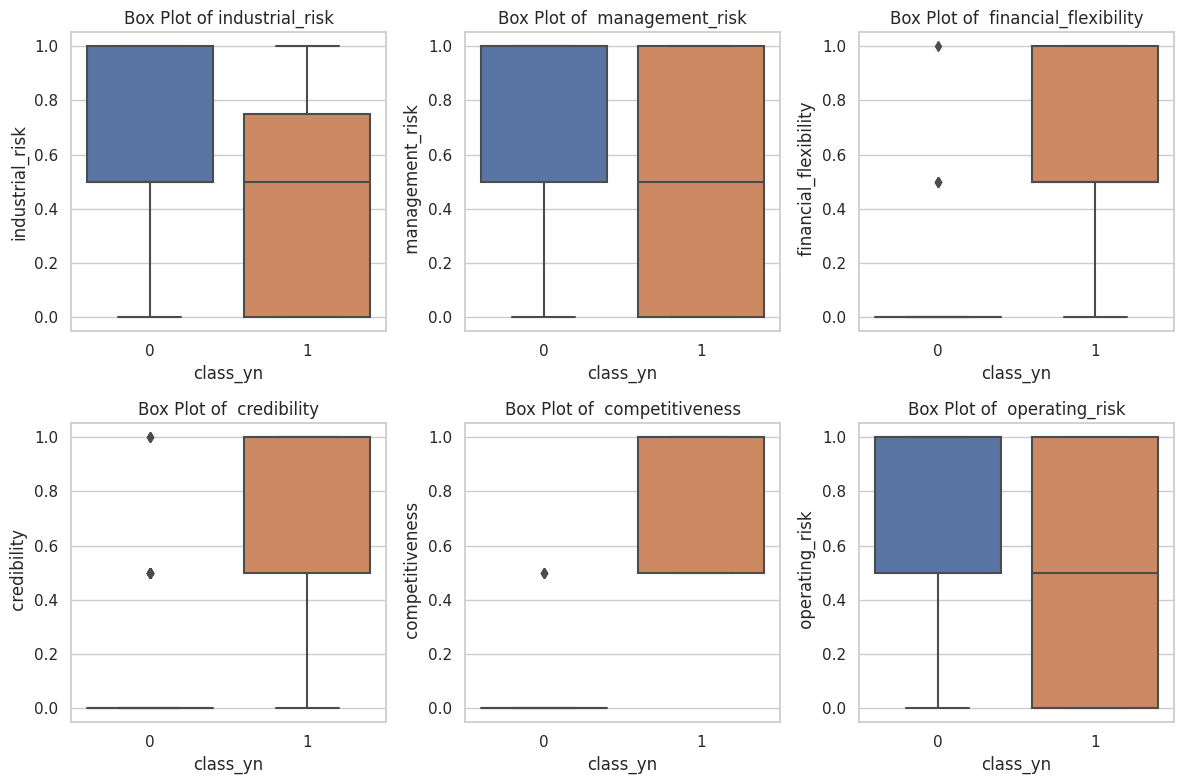

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create box plots for each attribute by class
attributes = bankrupt.columns[:-1]  # Exclude the "class" column

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)
    sns.boxplot(x='class_yn', y=attribute, data=bankrupt, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {attribute}')
    axes[row, col].set_xlabel('class_yn')
    axes[row, col].set_ylabel(attribute)

# Adjust layout for a cleaner display
plt.tight_layout()

# Show the box plots
plt.show()

In [ ]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

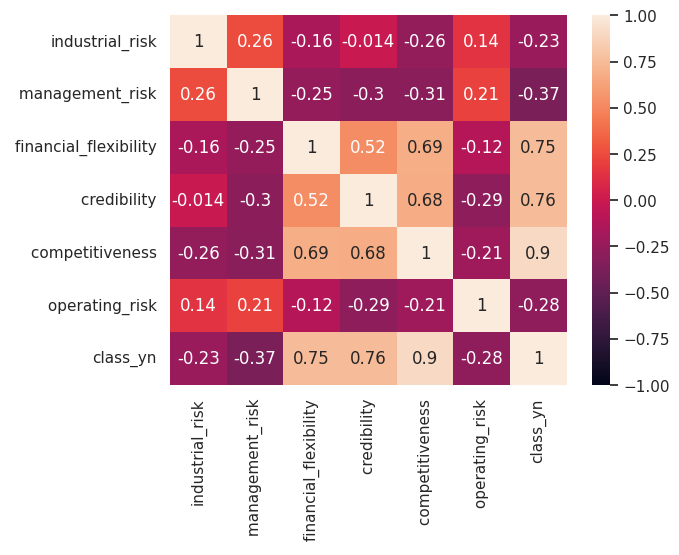

In [ ]:
sns.heatmap(bankrupt_new.corr(), vmin = -1, vmax = 1, annot = True)

<Axes: xlabel='class_yn', ylabel='count'>

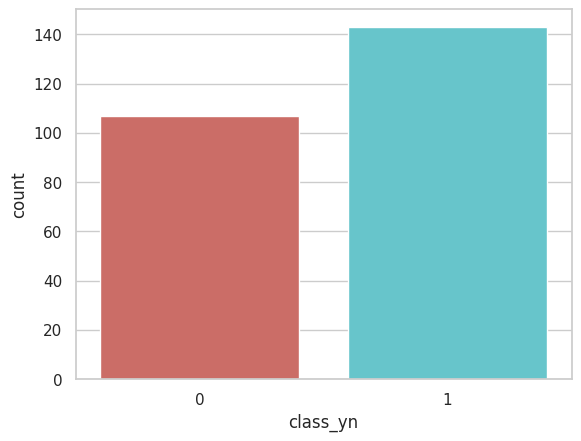

In [ ]:
sns.countplot(x = 'class_yn', data = bankrupt_new, palette = 'hls')

<Axes: xlabel=' financial_flexibility', ylabel='count'>

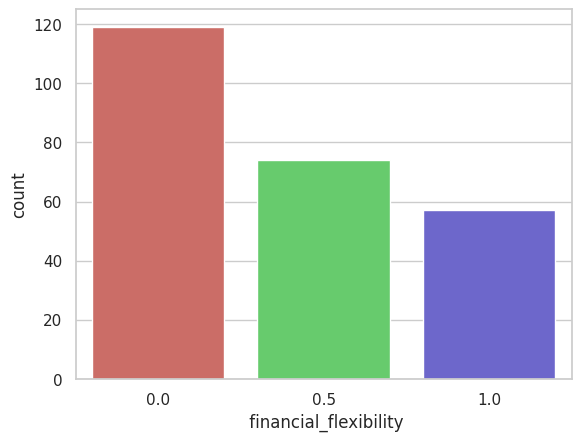

In [ ]:
sns.countplot(x = ' financial_flexibility', data = bankrupt_new, palette = 'hls')

<Axes: xlabel='class_yn'>

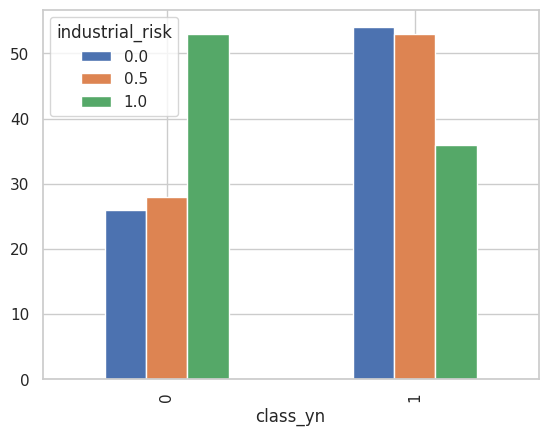

In [ ]:
pd.crosstab(bankrupt.class_yn, bankrupt.industrial_risk).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

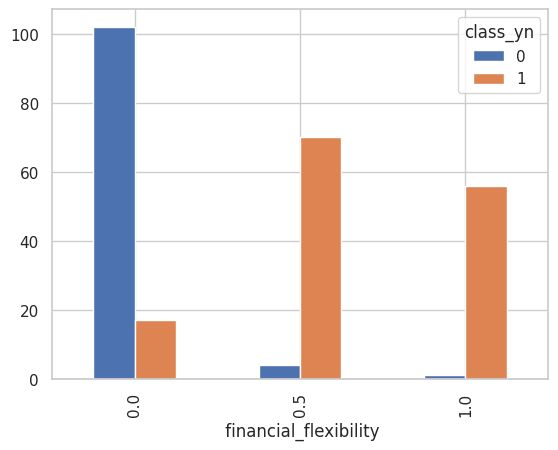

In [ ]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new['class_yn']).plot(kind = 'bar')

<Axes: xlabel=' credibility'>

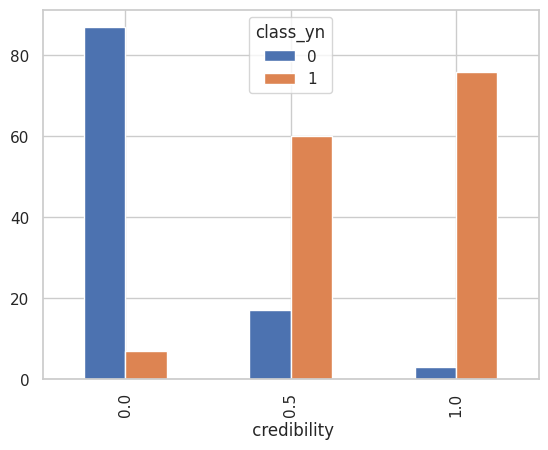

In [ ]:
pd.crosstab(bankrupt_new[' credibility'], bankrupt_new.class_yn).plot(kind = 'bar')

<Axes: xlabel=' operating_risk'>

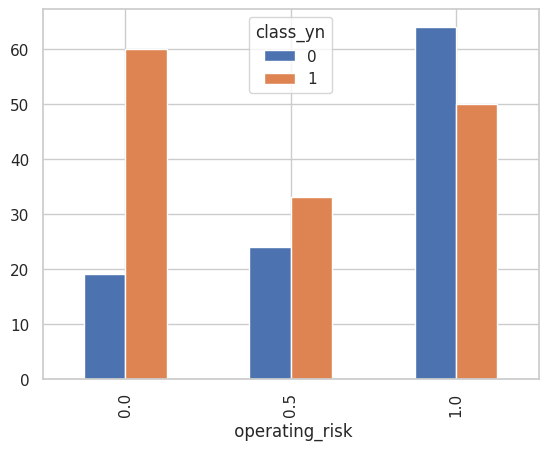

In [ ]:
pd.crosstab(bankrupt_new[' operating_risk'], bankrupt_new.class_yn).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

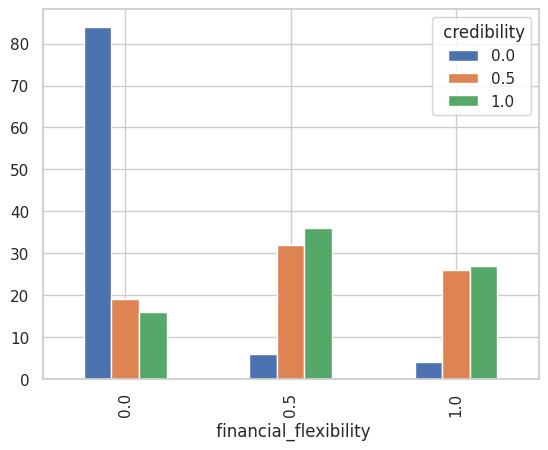

In [ ]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new[' credibility']).plot(kind = 'bar')

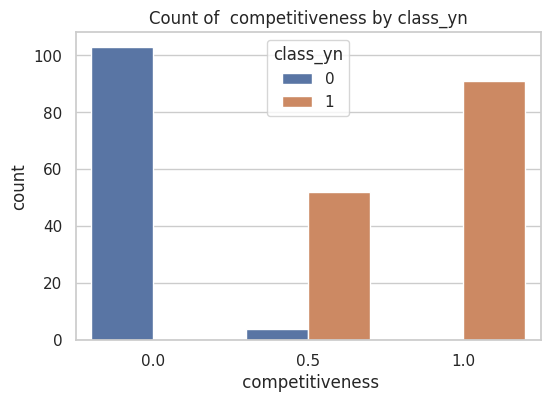

In [ ]:
# Define the categorical attributes and the data
categorical_attributes = [' competitiveness']

# Loop through each categorical attribute and create a countplot
for attribute in categorical_attributes:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=bankrupt_new, x=attribute, hue='class_yn')
    plt.title(f'Count of {attribute} by class_yn')
    plt.show()

In [ ]:
np.shape(bankrupt_new)

(250, 7)

In [ ]:
# Input
x = bankrupt_new.iloc[:,:-1]

# Target variable

y = bankrupt_new.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0) # Splitting the data into train and test

Model Building

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticlassifier = LogisticRegression()

In [ ]:
logisticlassifier.fit(x_train, y_train)

logisticlassifier.coef_ # coefficients of features

array([[-0.43044914, -0.73309162,  2.37729553,  2.31022854,  3.68601327,
        -0.53101906]])

In [ ]:
y_pred = logisticlassifier.predict(x_test)
y_pred  # Prediction on test data

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix # Confusion Matrix

confusion_logist = confusion_matrix(y_test, y_pred)

confusion_logist

array([[26,  0],
       [ 0, 37]])

In [ ]:
train_acc_logist = np.mean(logisticlassifier.predict(x_train)== y_train) # Training Accuracy
train_acc_logist

0.9946524064171123

In [ ]:
test_acc_logist = np.mean(logisticlassifier.predict(x_test)== y_test) # Testing Accuracy
test_acc_logist

1.0

In [ ]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

Accuracy of overall model

In [ ]:
logisticlassifier.fit(x, y)

logisticlassifier.coef_ # coefficients of features

array([[-0.5741981 , -0.75397787,  2.61063166,  2.41434068,  4.00955826,
        -0.51358089]])

In [ ]:
y_pred = logisticlassifier.predict(x)

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

array([[106,   1],
       [  0, 143]])

In [ ]:
acc = accuracy_score(y, y_pred)
acc

0.996

In [ ]:
logisticlassifier.score(x_test, y_test)

1.0

In [ ]:
logisticlassifier.score(x_train, y_train)

0.9946524064171123

Lasso Regularization

In [ ]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol =0.1)

lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(x_test, y_test)

-0.0017265366431771234

In [ ]:
lasso_reg.score(x_train, y_train)

0.0

Ridge Regularization

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(x_test, y_test)

0.7688398562243322

In [ ]:
ridge_reg.score(x_train, y_train)

0.7452859981668728

KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import math
math.sqrt(len(y_test)) # deciding k value

7.937253933193772

In [ ]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')

In [ ]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
y_pred = KNN_classifier.predict(x_test) # Predicting Test results
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 1 36]]


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.9863013698630138


In [ ]:
from sklearn.metrics import accuracy_score # Accuracy of KNN model

KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

0.9841269841269841

Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Creating GaussianNB and MultinomialNB functions

GNB = GaussianNB()
MNB = MultinomialNB()

In [ ]:
# Building model with GaussianNB
Naive_GNB = GNB.fit(x_train ,y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
# Evaluating model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 0 37]]


In [ ]:
# Accuracy of GNB
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test , y_pred)
GNB_acc

1.0

In [ ]:
# Building the model with MultinomialNB
Naive_MNB = MNB.fit(x_train ,y_train)

y_pred = Naive_MNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
# Evaluating Model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 0 37]]


In [ ]:
# Accuracy of MNB
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

1.0

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Kernel = Linear model

model_linear = SVC(kernel = 'linear')

model_linear.fit(x_train, y_train)

pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear==y_test)

1.0

In [ ]:
# Kernel = ploy model

model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

np.mean(pred_test_poly==y_test) # Accuracy

0.9841269841269841

In [ ]:
# Kernel - 'rbf' model (Radial Basis Function)

model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

np.mean(pred_test_rbf==y_test) # Accuracy

1.0

In [ ]:
import pickle
pickle_out = open("model_poly.pkl","wb")
pickle.dump(model_poly, pickle_out)
pickle_out.close()